## Preparando ambiente

In [1]:
install.packages('tidyverse')
require(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Loading required package: raster

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select




In [3]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-27, (SVN revision 1148)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-6



## Pontos de referência para treinamento

In [4]:
pontosTreinamento = shapefile('cipef_poi.shp')

In [5]:
aoi = brick('cipef_50cm_v2.tif')
names(aoi) = c("red", "green", 'blue', 'alpha')
aoi = aoi[[-4]]

In [35]:
sampvals = extract(aoi, pontosTreinamento, df = TRUE)
sampvals = sampvals[, -1]
sampdata = data.frame(classvalue = pontosTreinamento@data$class, sampvals)
head(sampdata)

,classvalue,red,green,blue
,<int>,<dbl>,<dbl>,<dbl>
1,1,91,88,66
2,1,87,96,53
3,1,76,77,51
4,1,72,89,48
5,1,50,65,32
6,1,60,74,33


In [36]:
sampdata = sampdata %>%
  mutate(classvalue = case_when(
    classvalue == 1 ~ 1,
    classvalue == 2 ~ 0))
sampdata$classvalue = sampdata$classvalue %>% as.integer()

In [37]:
tail(sampdata)

,classvalue,red,green,blue
,<int>,<dbl>,<dbl>,<dbl>
54,0,113,119,135
55,0,154,103,72
56,0,163,106,74
57,0,140,148,157
58,0,124,127,131
59,0,186,183,188


## Treinamento

In [27]:
mylogit = glm(classvalue ~ red + green + blue, data = sampdata, family = "binomial")

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [38]:
predict(mylogit, newdata = data.frame(red = 186, green = 183, blue = 188), type = "response")

1 
2.220446e-16

In [39]:
summary(mylogit)


Call:
glm(formula = classvalue ~ red + green + blue, family = "binomial", 
    data = sampdata)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.399e-05  -2.100e-08  -2.100e-08   2.100e-08   3.497e-05  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    78.631  58669.656   0.001    0.999
red            -1.223   1158.094  -0.001    0.999
green           2.669   2331.593   0.001    0.999
blue           -2.736   1892.702  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8.0959e+01  on 58  degrees of freedom
Residual deviance: 4.0919e-09  on 55  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


## Classificação

In [29]:
imaClass = predict(aoi, mylogit)
imaClass

class      : RasterLayer 
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : -265.9416, 210.812  (min, max)


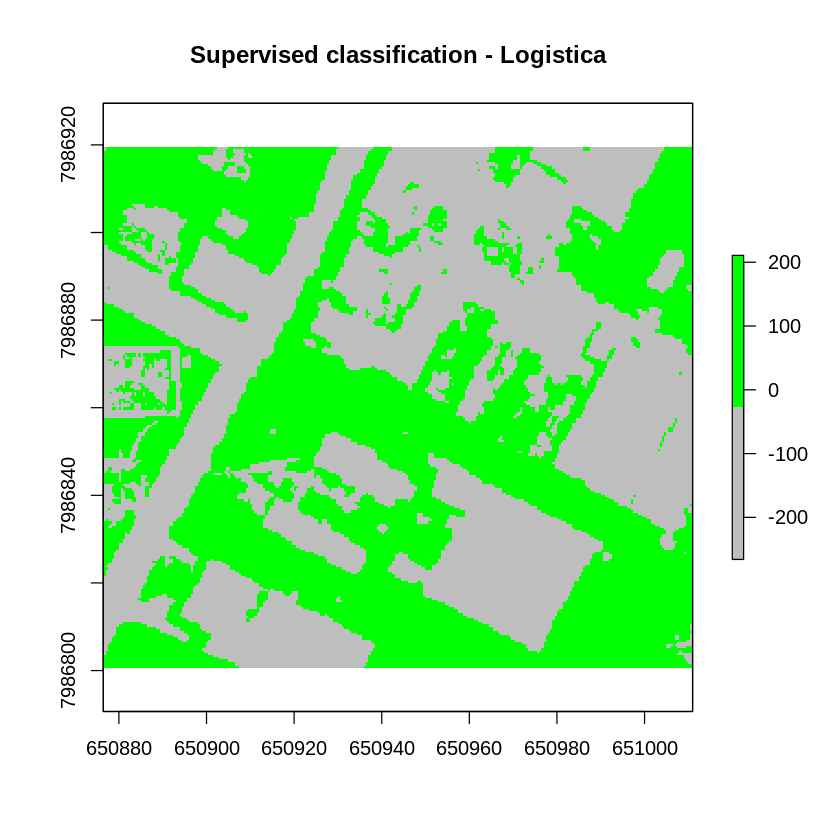

In [30]:
mycolor <- c("gray", "green")

plot(imaClass, main = 'Supervised classification - Logistica', col=mycolor)

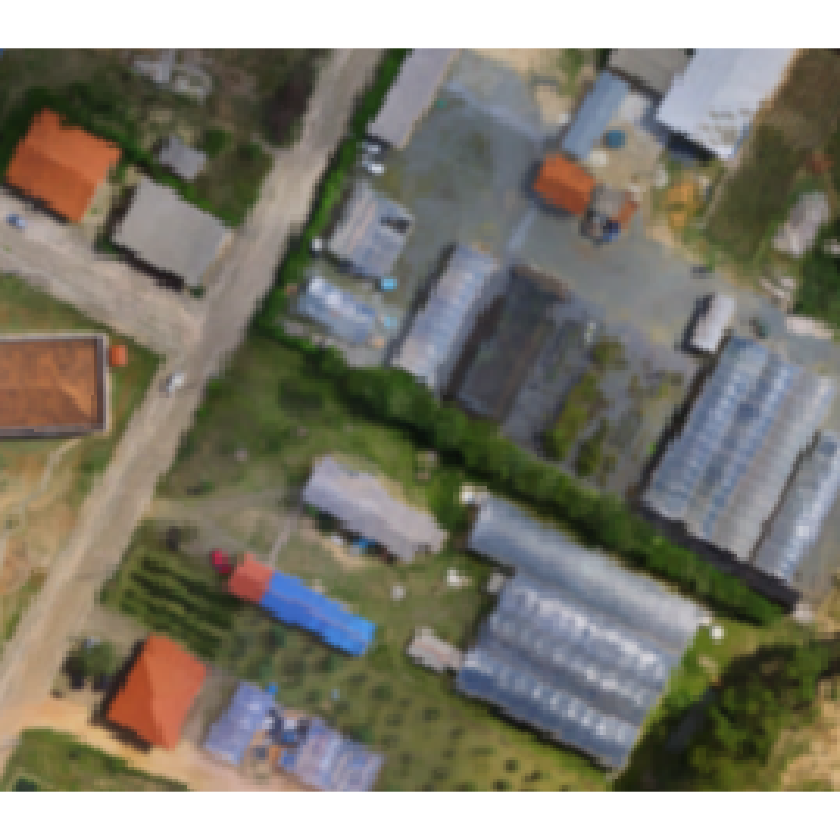

In [32]:
plotRGB(aoi)